In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [15]:
df=pd.read_csv("height-weight.csv")

In [16]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

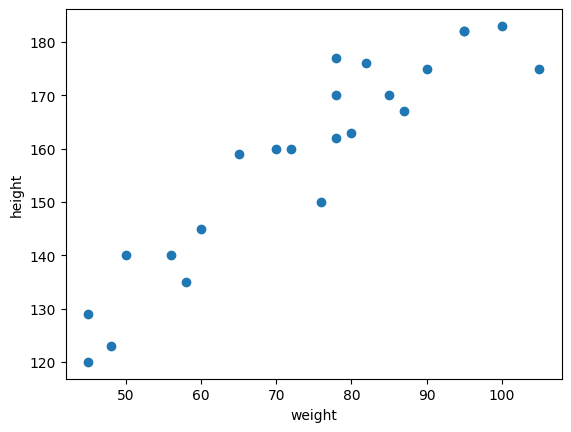

In [18]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("weight")
plt.ylabel("height")

In [19]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [20]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


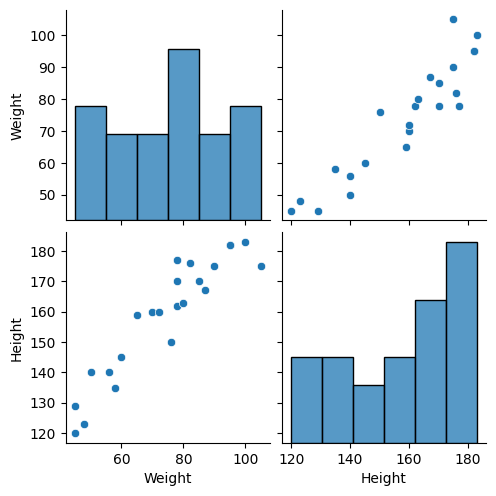

In [24]:
import seaborn as sns
sns.pairplot(df)

In [28]:
X=df[["Weight"]]
Y=df["Height"]

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [31]:
!pip install scikit-learn


  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.9 MB 4.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/8.9 MB 6.4 MB/s eta 0:00:02
   ---------------- ----------------------- 3.7/8.9 MB 6.8 MB/s eta 0:00:01
   --------------------- ------------------ 4.7/8.9 MB 6.3 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.9 MB 6.1 MB/s eta 0:00:01
   ------------------------------ --------- 6.8/8.9 MB 5.9 MB/s eta 0:00:01
   ----------------------------------- ---- 7.9/8.9 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 5.6 MB/s eta 0:00:00
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
Using 

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [41]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)


In [43]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [44]:
regression.coef_

array([17.2982057])

In [45]:
regression.intercept_

np.float64(156.47058823529412)

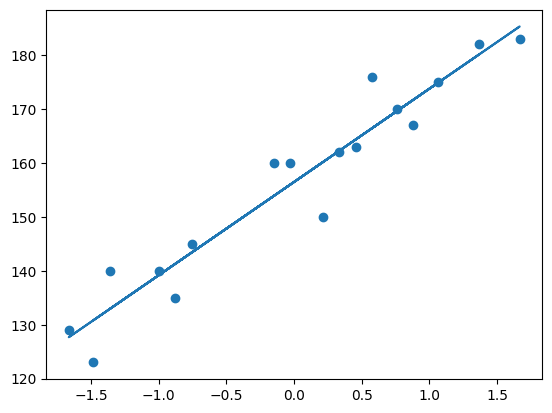

In [ ]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [51]:
y_pred=regression.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605
